- Author   -  Saurav vara prasad Channuri

- Roll No -  ES16BTECH11007

- Edge - detection










In [0]:
import numpy as np
import scipy.misc as sp
from skimage import io
from scipy import ndimage as nd
import matplotlib
import scipy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from PIL import Image

#### Explaination and comments regarding the filters are written at the end

In [0]:
real_image = io.imread("clown.tif")

real_image_grey = io.imread('clown.tif', as_gray=True)


In [4]:
print "real image shape = ", real_image.shape

real image shape =  (256, 256)


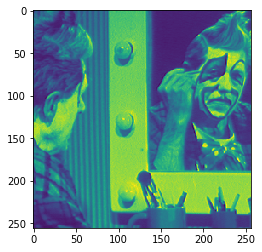

In [5]:
plt.imshow(real_image)

scipy.signal.correlate2d(real_image_grey, screenshot_grey, mode='same')

In [0]:
def pad( image, template, padding_mode ):
    
    if(padding_mode == "edge"):
      top = image[0]
      top = np.tile(top, (template.shape[0]/2, 1))
      image = np.vstack((top, image)) # top padding

      bottom = image[-1]
      bottom = np.tile(bottom,(template.shape[0]/2, 1))
      image = np.vstack((image, top)) # Botton padding


      left = image.T[0]
      left = np.tile(left, (template.shape[1]/2, 1))
      image = np.vstack((left, image.T)).T   # left padding

      right = image.T[-1]
      right = np.tile(right, (template.shape[1]/2, 1))
      image = np.vstack((image.T, right)).T  # right padding

    elif(padding_mode == "wrap"):
      top = image[image.shape[0]-(template.shape[0]/2) : , :]
      image = np.vstack((top, image))
      
      bottom = image[:template.shape[0]/2, :]
      image = np.vstack((image, bottom))
      
      left = image[: , image.shape[1] - (template.shape[1]/2): ]
      image = np.vstack((left.T, image.T)).T
      
      right = image[:, :template.shape[1]/2]
      image = np.vstack((image.T, right.T)).T
      
    return image
    
    

In [0]:
def plot(plot_data):
  
  # for adjusting the display figure size
  matplotlib.rcParams['figure.figsize'] = [10, 20]
  matplotlib.rcParams.update({'font.size': 10})

  # plotting images in a grid
#   y, x = np.unravel_index(np.argmax(corr_output), corr.shape) 
  
  edge_output_v = plot_data["convolve_output_vertical"]
  edge_output_h = plot_data["convolve_output_horizontal"]
  
  edge_real_v = plot_data["convolve_vertical_real"   ]
  edge_real_h = plot_data["convolve_horizontal_real" ]
  
  laplacian_output = plot_data["convolve_output_laplacian"]
  laplacian_real   = plot_data["convolve_laplacian_real"]

  fig, ([[ax_kernel_vertical   , ax_kernel_horizontal  ],
         [ax_orig              , ax_edge               ],
         [ax_vertical          , ax_horizontal         ],
         [ax_vertical_exp      , ax_horizontal_exp     ],
         [ax_laplacian         , ax_laplacian_exp      ]]) = plt.subplots(5, 2)

  # plotting real image
  ax_orig.imshow(plot_data["image"], cmap = 'gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()

  # plotting final edge output
  ax_edge.imshow(abs(edge_output_v) + abs(edge_output_h), cmap = 'gray')
  ax_edge.set_title('final edge output')
  ax_edge.set_axis_off()

  # vertical kernel
  ax_kernel_vertical.imshow((plot_data["kernel_vertical"]), cmap = 'gray')
  ax_kernel_vertical.set_title('vertical edge kernel')
  ax_kernel_vertical.set_axis_off()
  
  #Horizontal kernel
  ax_kernel_horizontal.imshow((plot_data["kernel_horizontal"]), cmap = 'gray')
  ax_kernel_horizontal.set_title('horizontal edge kernel')
  ax_kernel_horizontal.set_axis_off()

  #plotting the vertical edge output
  ax_vertical.imshow(abs(edge_output_v), cmap = 'gray')
  ax_vertical.set_title('convolution vertical edge output')
  ax_vertical.set_axis_off()

  #plotting real vertical edge
  ax_vertical_exp.imshow(abs(edge_real_v), cmap = 'gray')
  ax_vertical_exp.set_title('expected convolution vertical edge')
  ax_vertical_exp.set_axis_off()
  
  #plotting the horizontal edge output
  ax_horizontal.imshow(abs(edge_output_h), cmap = 'gray')
  ax_horizontal.set_title('convolution horizontal edge output')
  ax_horizontal.set_axis_off()

  #plotting real horizontal edge
  ax_horizontal_exp.imshow(abs(edge_real_h), cmap = 'gray')
  ax_horizontal_exp.set_title('expected convolution horizontal edge')
  ax_horizontal_exp.set_axis_off()

  #plotting laplacian filtering of the image output
  ax_laplacian.imshow(abs(laplacian_output), cmap = 'gray')
  ax_laplacian.set_title('laplacian output')
  ax_laplacian.set_axis_off()

  #plotting real laplacian filtering of the image
  ax_laplacian_exp.imshow(abs(laplacian_real), cmap = 'gray')
  ax_laplacian_exp.set_title('laplacian of gaussian output')
  ax_laplacian_exp.set_axis_off()
  
#   fig.title("edge outputs")

  fig.show()

In [0]:
def convolution(data):
  image         = data["image"]
  template      = data["kernel"]
  padding_mode  = data["padding"]
  
  
  padded = pad(image, template, padding_mode)
  corr_output = np.empty(image.shape)

  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          temp_matrix = padded[i:i+template.shape[0] , j:j+template.shape[1]]
          corr_output[i][j] = np.sum(template*temp_matrix)
  
  return corr_output, padded

In [0]:
def invert(template):
 
  
  template = np.flip(template, axis = 0)
  template = np.flip(template, axis = 1)
      
  return template

In [0]:
def convolve(data):
  
  image = data["image"]
  kernel_vertical   = data["kernel_vertical"]
  kernel_horizontal = data["kernel_horizontal"]
  kernel_laplacian  = data["kernel_laplacian"]
  LoG = data["LoG"]

  data_vertical  = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_vertical,
                      "padding"          : "wrap"
                    }
  
  
  data_horizontal = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_horizontal,
                      "padding"          : "wrap"
                    }
  
  
  data_laplacian = {
                      "image"            : real_image_grey,
                      "kernel"           : kernel_laplacian,
                      "padding"          : "wrap"
                    }
  
  
  convolve_output_vertical  , padded_vertical      = convolution(data_vertical)

  convolve_output_horizontal, padded_horizontal    = convolution(data_horizontal)
  
  convolve_output_laplacian, padded_laplacian      = convolution(data_laplacian)
  
  convolve_vertical                     = scipy.signal.convolve2d(image,
                                                       kernel_vertical,
                                                       boundary='symm',
                                                       mode='same')
  
  convolve_horizontal                   = scipy.signal.convolve2d(image,
                                                       kernel_horizontal,
                                                       boundary='symm',
                                                       mode='same')
  
  convolve_laplacian                   = scipy.signal.convolve2d(image,
                                                       LoG,
                                                       boundary='symm',
                                                       mode='same')
  
  print "convolution done \n"
  
  plot_data = {
               "image"                      : image,  # real image
#                "padded"                     : padded, # padded image
               
               # kernels
               "kernel_vertical"            : kernel_vertical,
               "kernel_horizontal"          : kernel_horizontal,
               
               # Real outputs
               "convolve_vertical_real"     : convolve_vertical,
               "convolve_horizontal_real"   : convolve_horizontal,
                
               # Real laplacian output
               "convolve_laplacian_real"    : convolve_laplacian,
      
      
               # our outputs
               "convolve_output_vertical"   : convolve_output_vertical,
               "convolve_output_horizontal" : convolve_output_horizontal,
  
               # laplacian output
               "convolve_output_laplacian"  : convolve_output_laplacian
              }
  
  
  plot(plot_data)
  
  print "plots done"
  print "____________________________________________________________\n"
  

convolution done 

plots done
____________________________________________________________



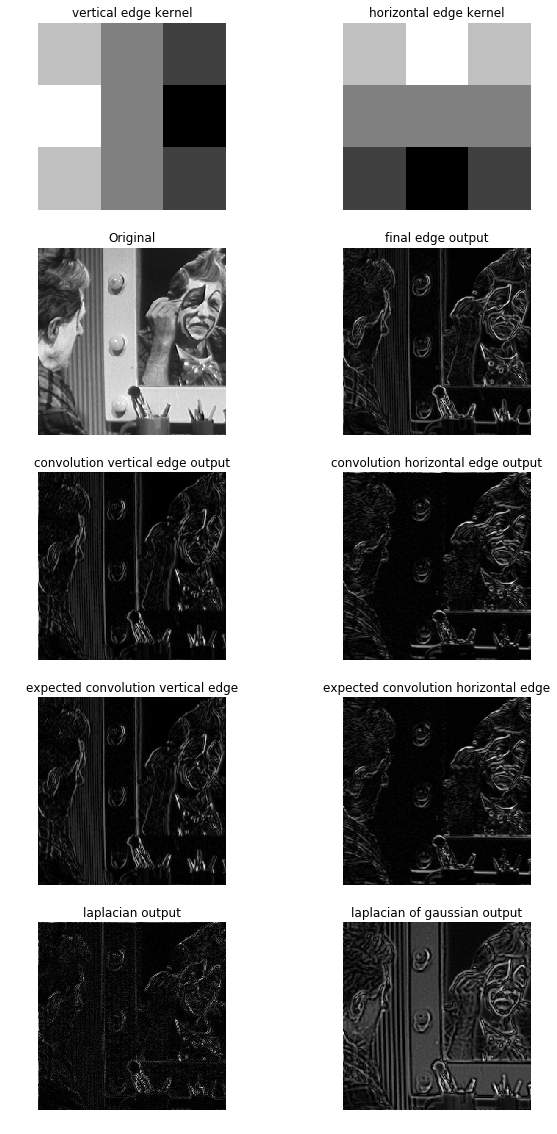

In [13]:
kernel_vertical    = np.array([[1, 0, -1],
                               [2, 0, -2],
                               [1, 0, -1]]) 

kernel_horizontal  = np.array([[ 1,  2,  1],
                               [ 0,  0,  0],
                               [-1, -2, -1]]) 

laplacian = np.array([[ 0, -1,  0],
                      [-1,  4, -1],
                      [ 0, -1,  0]])

gaussian  = np.array([[ 1, 2, 1],
                      [ 2, 4, 2],
                      [ 1, 2, 1]])

LoG = np.array([[0, 0, 3,   2,   2,   2, 3, 0, 0],
                [0, 2, 3,   5,   5,   5, 3, 2, 0],
                [3, 3, 5,   3,   0,   3, 5, 3, 3],
                [2, 5, 3, -12, -12, -12, 3, 5, 2],
                [2, 5, 0, -23, -40, -23, 0, 5, 2],
                [2, 5, 3, -12, -12, -12, 3, 5, 2],
                [3, 3, 5,   3,   0,   3, 5, 3, 3],
                [0, 2, 3,   5,   5,   5, 3, 2, 0],
                [0, 0, 3,   2,   2,   2, 3, 0, 0]])


data = {
          "image"            : real_image_grey,
          "kernel_vertical"  : kernel_vertical,
          "kernel_horizontal": kernel_horizontal,
          "kernel_laplacian" : laplacian,
          "LoG"              : LoG,
          "padding"          : "wrap"
       }

convolve(data)

# Inferences and comments

 In the above outputs we can make the following observations
 
 #### Sobel Filter
 
 - When we applied sobel filter for horizontal edges, it was able to find out only horizontal edges and not vertical edges. 
 
 - Horizontal sobel filter works by taking gradients in the vertical direction and if the gradient is high, it detects an edge.
 
 - Similarly the vertical sobel filter finds vertical edges and is unable to find horizontal edges
 
 - Vertical sobel filter finds the gradients along horizontal direction and if the gradient value is high, it detects an edge.
 
 - We know that gradient of a line is perpendicular to it, so the vertical sobel filter detects gradients along horizontal direction, meaning there is a vertical edge

- and the Horizontal sobel filter detects gradients in vertical direction, meaning the edge is horizontal.


#### Laplacian filter
- lalplacian is taking the second derievative of the image and finding the edged

- The laplacian kernel is very sensitive to noise as can be observed from the image output above and can work better when the noise is reduced maybe by applying a gaussian.

- Laplacian filter alone cannot work better, it needs to be coupled with gaussian to reduce noise and detect edges

#### Comparision with inbuilt functions
- The output from inbuilt function and my function are presented in the above image box and you can observe they almost look the same.

- The inbuilt function seems to work a bit more faster than my function, it maybe because of the linear multiplication and image part extraction in the convolution part and maybe the inbuilt function is a bit more modified in that part and can work faster.

